In [1]:
import stream2 as st2
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/__init__.py:70: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return modu

In [12]:
adata = sc.read("Matrix/data_p3.h5ad")

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/_io/h5ad.py:266: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


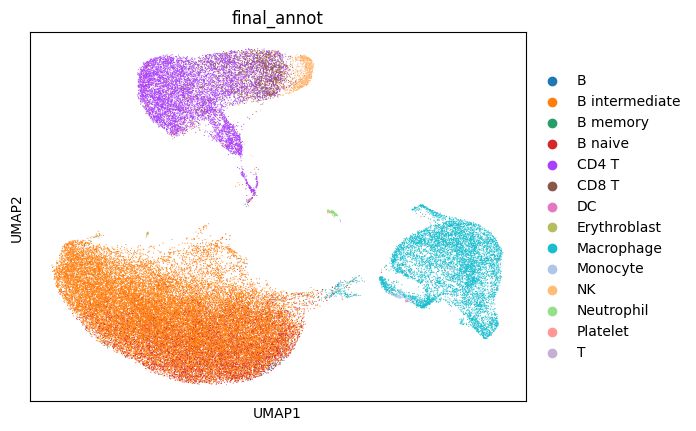

In [13]:
sc.pl.umap(adata,color=['final_annot'])

Found 5 components


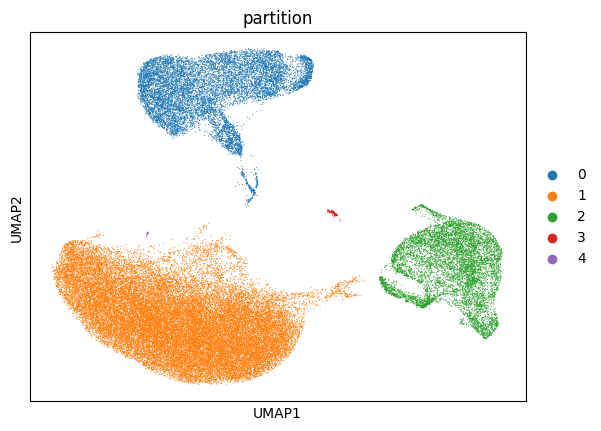

In [14]:
sc.pp.neighbors(adata,use_rep='X_umap')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

<Axes: xlabel='partition'>

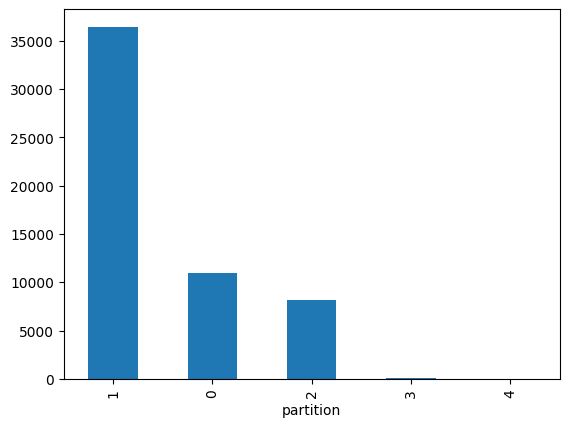

In [15]:
adata.obs['partition'].value_counts().plot.bar()

Seeding initial graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


Seeding initial graph for each partition...
Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


ValueError: could not find bridge_annot in `adata.obs.columns` and `adata.var_names`

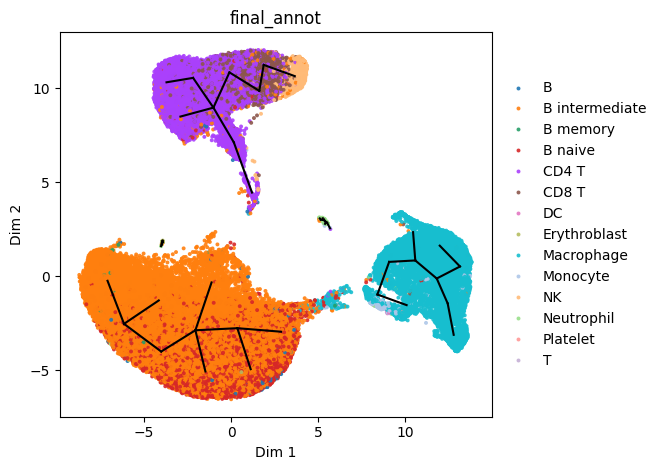

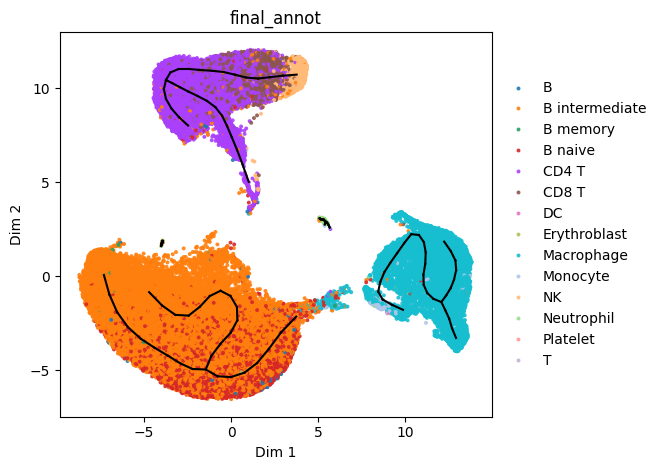

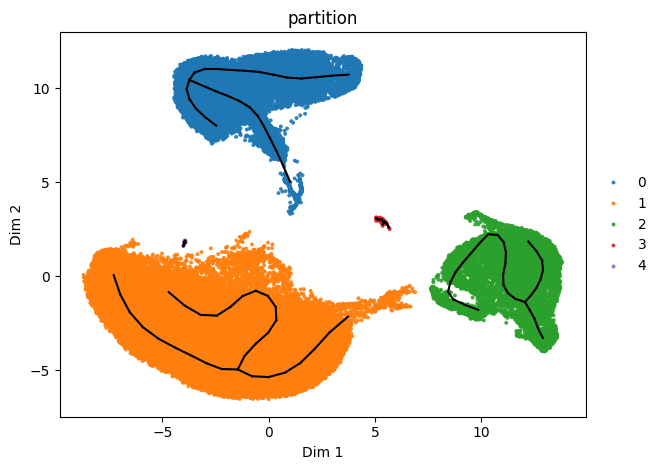

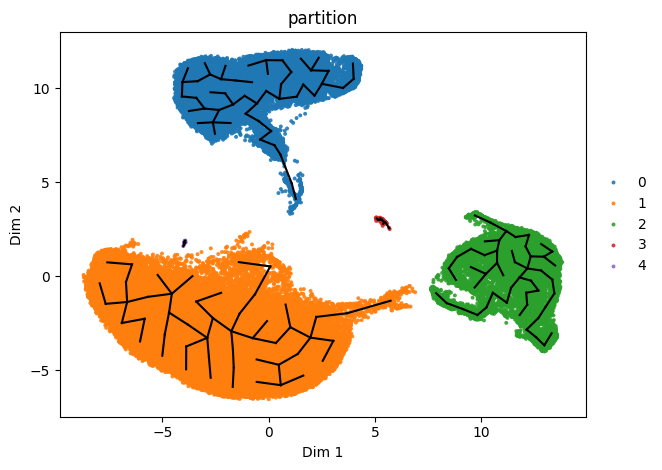

In [16]:
st2.tl.seed_graph(adata,obsm='X_umap',use_partition=True)
st2.pl.graph(adata,key='seed_epg',color=['final_annot'])
st2.tl.learn_graph(adata,obsm='X_umap', n_nodes=30,use_partition=True)
st2.pl.graph(adata,key='epg',color=['final_annot'])
st2.pl.graph(adata,key='epg',color=['partition'])
use_partition=['0','1','2']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=50,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05,use_partition=use_partition)
st2.pl.graph(adata,key='seed_epg',color=['partition'])
st2.pl.graph(adata,key='epg',color=['bridge_annot'],fig_size=(15,10),save_fig=True,fig_path='Plots/',fig_name='stream2_p2.pdf')

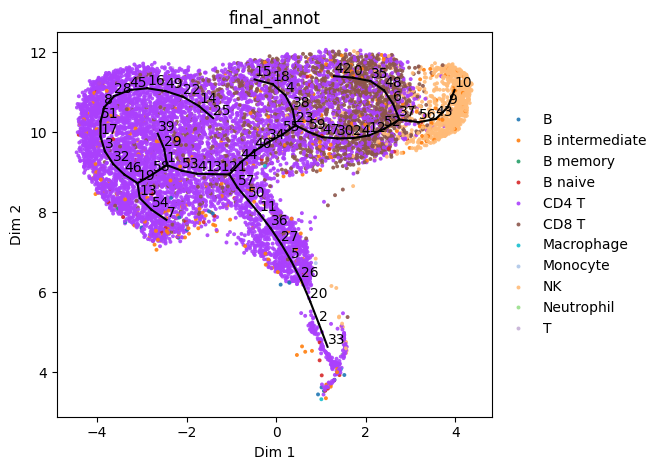

In [17]:
sadata = st2.tl.get_component(adata,'0')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


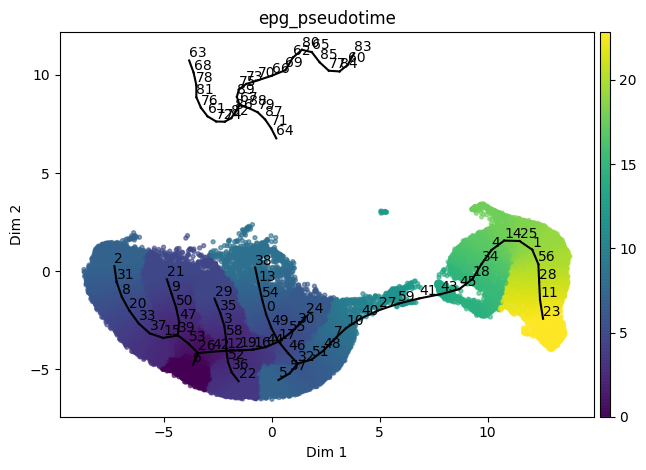

In [11]:
st2.tl.infer_pseudotime(adata,source=6,key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])